# 확률 밀도 함수의 독립

만약 두 확률 변수 $X$, $Y$의 결합 확률 밀도 함수(joint pdf)가 주변 확률 밀도 함수(marginal pdf)의 곱으로 나타나면 두 확률 변수가 서로 **독립(independent)**이라고 한다.

$$ f_{XY}(x, y) = f_X(x)f_Y(y) $$


이 함수 식에서 볼 수 있듯이 독립인 경우에는 각각의 주변 확률 밀도 함수만으로 결합 확률 밀도 함수의 모양이 결정된다(높이는 달라질 수 있다). 즉, $Y$가 어떤 값을 가지더라도 확률 밀도 함수 $f(X, Y)$의 모양은 변하지 않는다.

## 반복시행


같은 확률 변수에서 여러개의 표본 데이터를 취하는 경우에는 독립인 두 개의 확률 변수에서 나온 표본으로 볼 수 있다.

따라서 확률 밀도 함수가 $f(x)$이고 표본 데이터가 $\{x_1, x_2, x_3, \cdots, x_N \}$이면 이 데이터 집합이 나올 수 있는 확률은 다음과 같다.

$$ f(x_1, x_2, x_3, \cdots, x_N ) = \prod_{i=1}^N f(x_i) $$  
 

## 조건부 확률분포

독립인 두 확률 변수 $X, Y$의 조건부 확률 밀도 함수는 주변 확률 밀도 함수와 같다.

$$ f_{X \mid Y} (x | y) = \dfrac{f_{XY}(x, y)}{f_{Y}(y)} = \dfrac{f_{X}(x) f_{Y}(y)}{f_{Y}(y)} = f_{X}(x) $$

$$ f_{Y \mid X} (y | x) = \dfrac{f_{XY}(x, y)}{f_{X}(x)} = \dfrac{f_{X}(x) f_{Y}(y)}{f_{X}(x)} = f_{Y}(y) $$

확률 변수 $X$가 다른 확률 변수 $Y$에 독립이면 조건부 확률 분포가 조건이 되는 확률 변수의 값에 영향을 받지 않는다. 즉, $Y$ 값이 $y_1$일 때와 $y_2$일 때의 조건부 확률 분포 $f(x \mid y_1)$과 $f(x \mid y_2)$이 같다는 의미이다. 

예를 들어 다음과 같은 두 이산 확률 변수의 결합 확률 분포를 보자.

In [1]:
np.set_printoptions(precision=4)
pmf1 = np.array([[1, 2, 3, 2, 1],
                 [2, 4, 6, 4, 2],
                 [4, 8,12, 8, 4],
                 [2, 4, 6, 4, 2],
                 [1, 2, 3, 2, 1]])
pmf1 = pmf1/pmf1.sum()
pmf1

array([[ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0444,  0.0889,  0.1333,  0.0889,  0.0444],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111]])

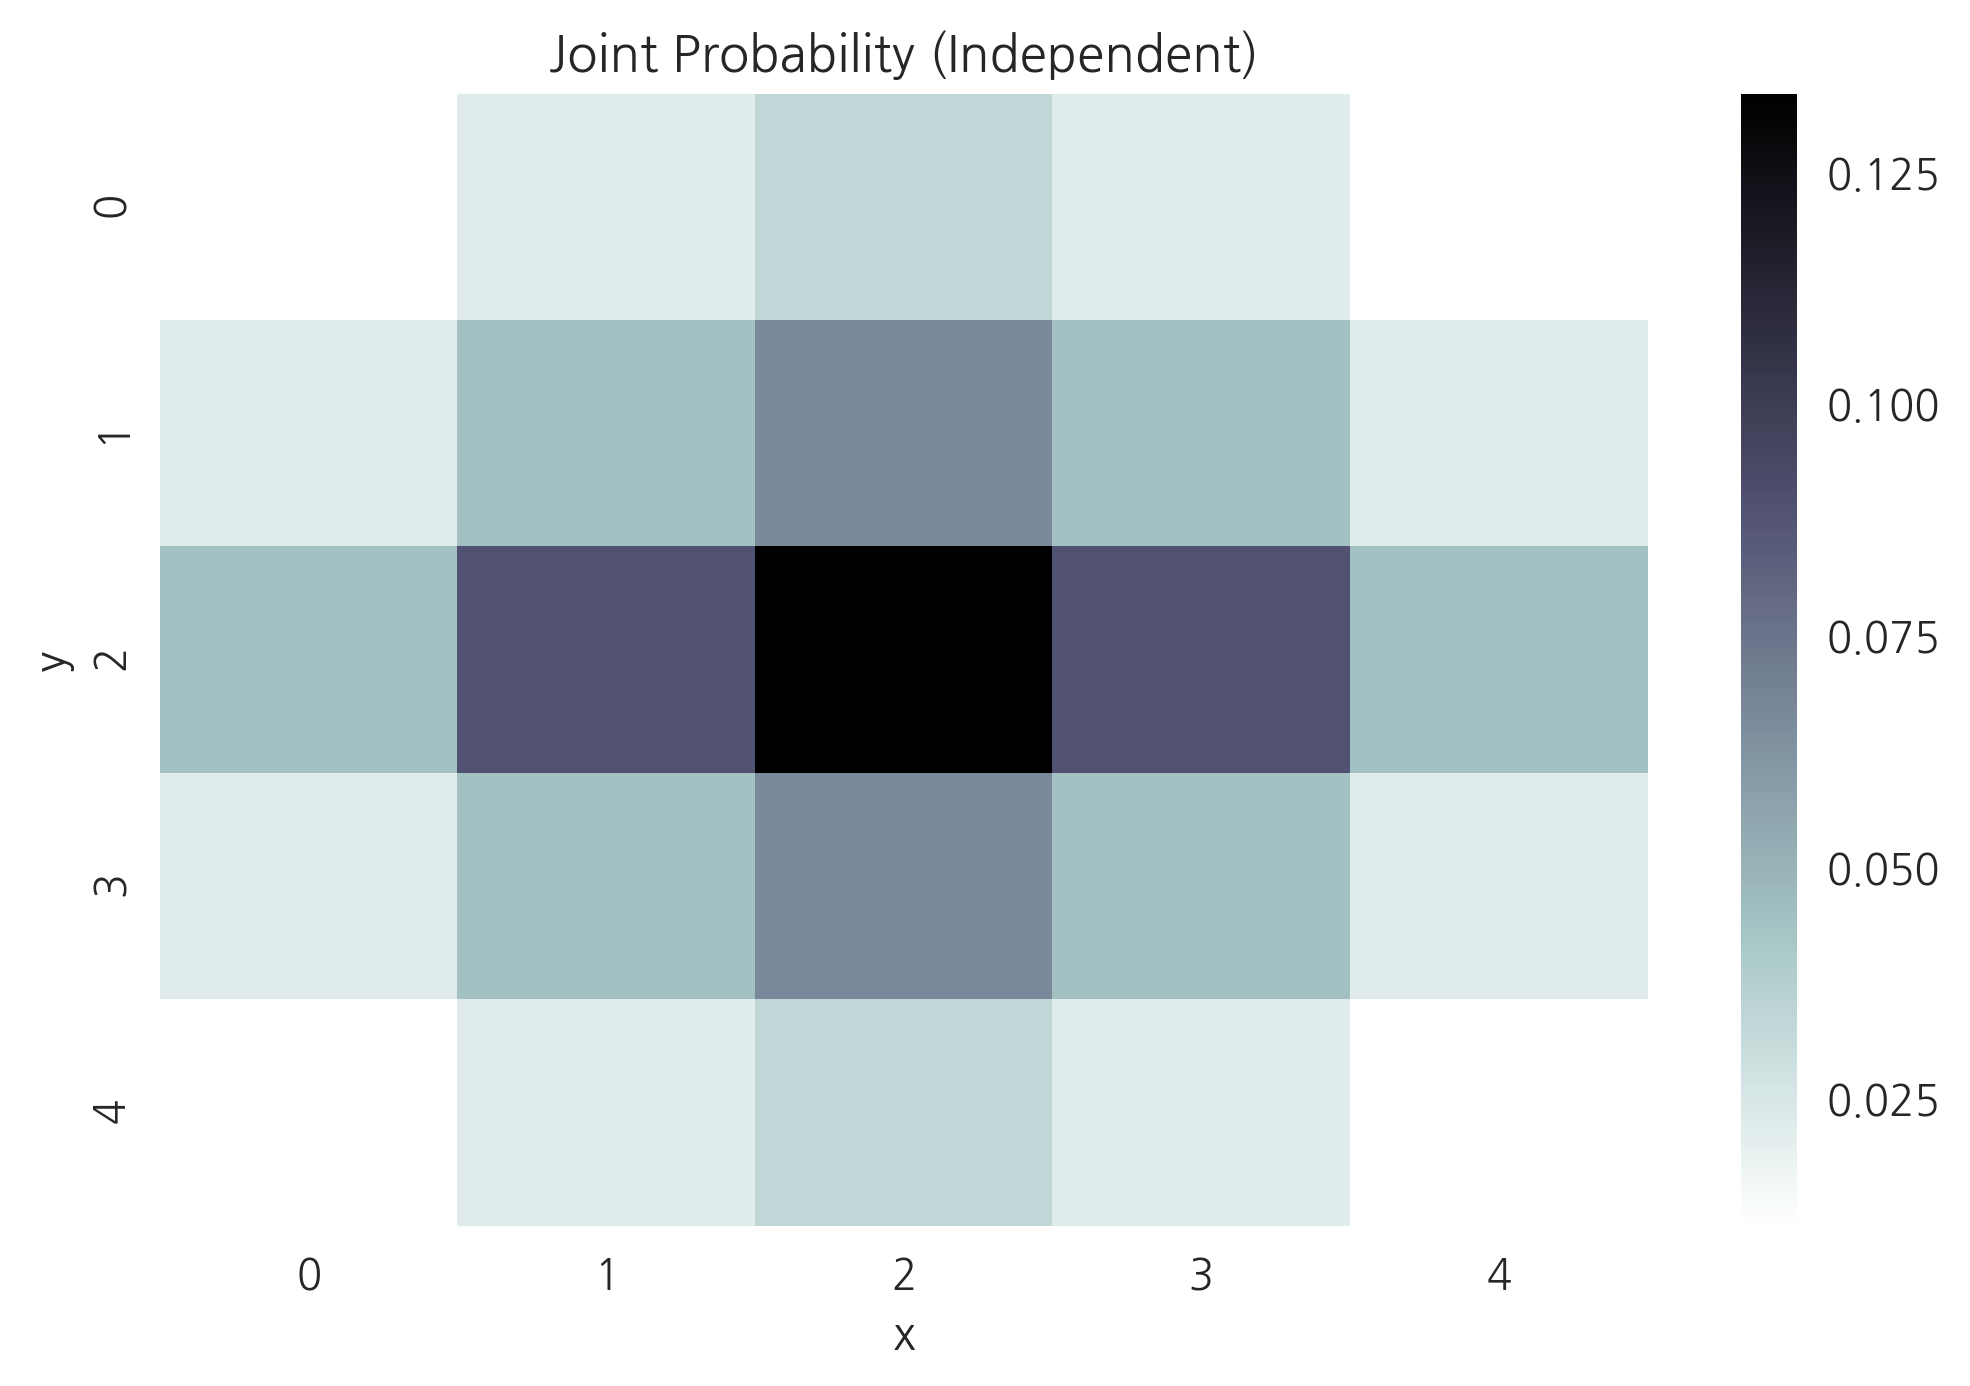

In [4]:
sns.heatmap(pmf1, cmap=mpl.cm.bone_r)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability (Independent)")
plt.show()

이 확률 분포는 다음 식에서 보다시피 주변 확률 분포의 곱으로 표현된다.

In [5]:
pmf1_marginal_x = pmf1.sum(axis=0)
pmf1_marginal_y = pmf1.sum(axis=1)
pmf = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]
pmf/pmf.sum()

array([[ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0444,  0.0889,  0.1333,  0.0889,  0.0444],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111]])

여러 가지 Y값을 바꾸어도 조건부 확률은 변하지 않는 것을 확인할 수 있다.


In [6]:
cond_x_y0 = pmf1[0, :]/pmf1_marginal_y[0]
cond_x_y0

array([ 0.1111,  0.2222,  0.3333,  0.2222,  0.1111])

In [7]:
cond_x_y1 = pmf1[1, :]/pmf1_marginal_y[1]
cond_x_y1

array([ 0.1111,  0.2222,  0.3333,  0.2222,  0.1111])

이번에는 다음과 같은 결합 확률 분포를 보자. 이 경우에는 독립 조건이 성립하지 않는다.

In [17]:
pmf2 = np.array([[0, 0, 0, 1, 1],
                 [0, 0, 2, 3, 1],
                 [0, 2, 5, 2, 0],
                 [1, 3, 2, 0, 0],
                 [1, 1, 0, 0, 0]])
pmf2 = pmf2/pmf2.sum()
pmf2

array([[ 0.  ,  0.  ,  0.  ,  0.04,  0.04],
       [ 0.  ,  0.  ,  0.08,  0.12,  0.04],
       [ 0.  ,  0.08,  0.2 ,  0.08,  0.  ],
       [ 0.04,  0.12,  0.08,  0.  ,  0.  ],
       [ 0.04,  0.04,  0.  ,  0.  ,  0.  ]])

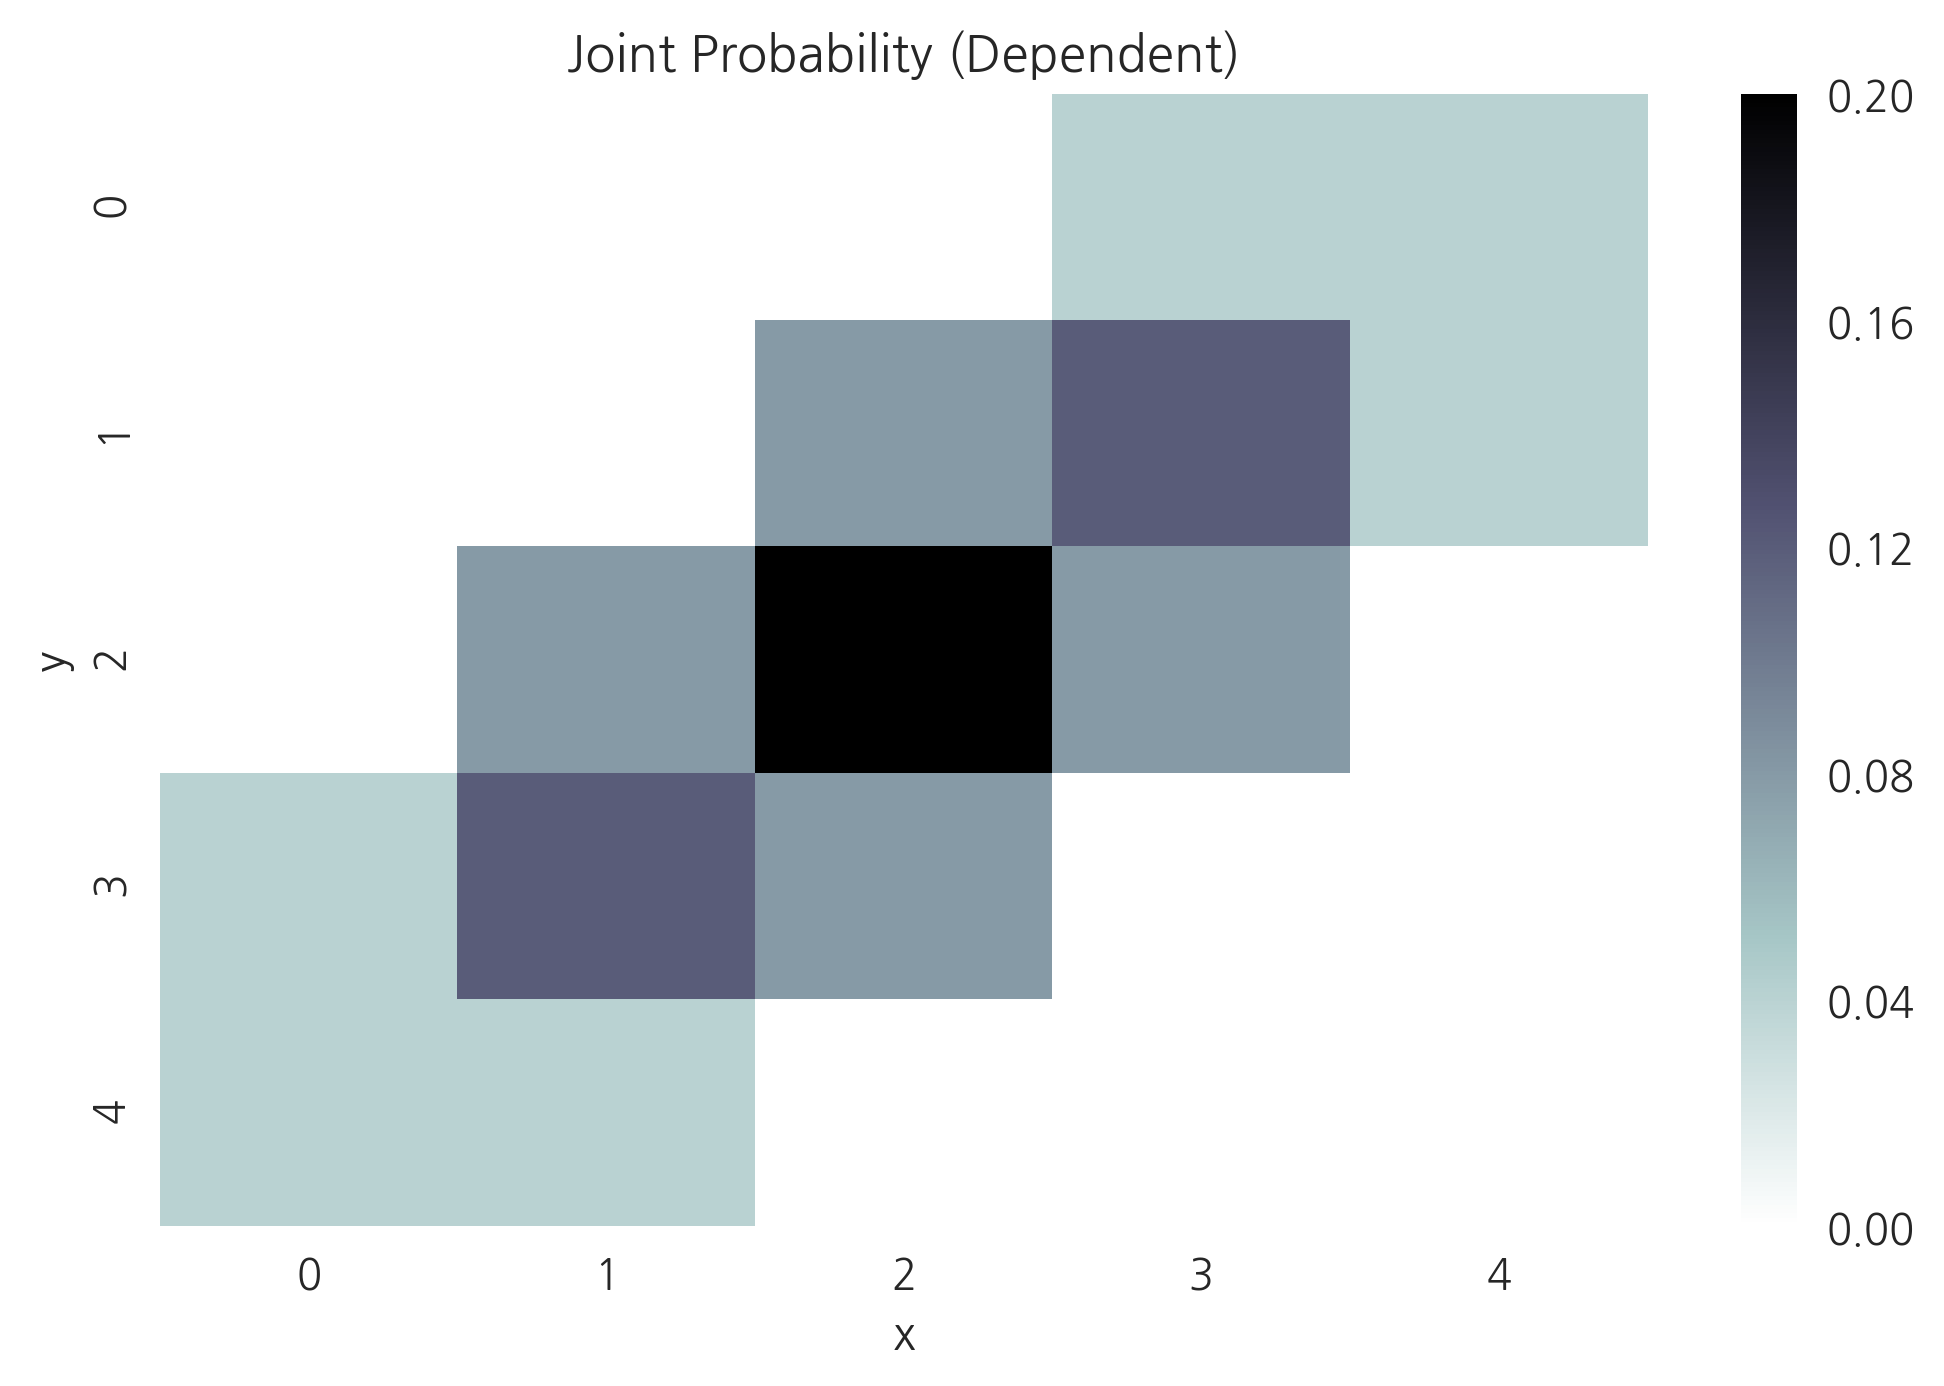

In [19]:
sns.heatmap(pmf2, cmap=mpl.cm.bone_r)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability (Dependent)")
plt.show()

이 경우에는 y값에 따라 x의 조건부 확률 분포가 달라지는 것을 확인할 수 있다.

In [20]:
pmf2_marginal_x = pmf2.sum(axis=0)
pmf2_marginal_y = pmf2.sum(axis=1)

In [21]:
cond_x_y0 = pmf2[0, :]/pmf2_marginal_y[0]
cond_x_y0

array([ 0. ,  0. ,  0. ,  0.5,  0.5])

In [22]:
cond_x_y1 = pmf2[1, :]/pmf2_marginal_y[1]
cond_x_y1

array([ 0.    ,  0.    ,  0.3333,  0.5   ,  0.1667])

두 확률 변수가 독립이 아닌 경우, 즉 결합 확률 분포(확률 밀도 함수 또는 확률 질량 함수)가 두 개의 주변 분포의 곱으로 나누어지지 않는 경우에는 두 확률 변수가 서로 **의존(dependent)**한다고 한다. 


#### 연습 문제 1

1. 독립인 두 이산 확률 변수의 결합 확률 질량 함수의 예를 들어라.
2. 독립인 두 연속 확률 변수의 결합 확률 밀도 함수의 예를 들어라.

## 독립 확률 변수의 기댓값

독립인 두 확률 변수 $X, Y$의 기댓값은 다음 성질을 만족한다. 

$$ \text{E}[XY] = \text{E}[X]\text{E}[Y] $$

$$ \text{E}[(X - \mu_X)(Y-\mu_Y)] = 0 $$

(증명)

$$ 
\begin{eqnarray}
\text{E}[XY] 
&=& \iint xy \;f_{XY}(x, y) \; dx dy  \\
&=& \iint  xy \;f_{X}(x)f_{Y}(y) \; dx dy \\
\end{eqnarray}
$$

Fubini의 정리에 의해 다중 적분의 값은 적분을 연속하여 한 값과 같다.
$$ 
\begin{eqnarray}
\text{E}[XY] 
&=& \int \left( \int xy \;f_{X}(x)f_{Y}(y) dx \right) dy \\
&=& \int \left( y\; f_{Y}(y) \left( \int x\; f_{X}(x) \; dx \right) \right) dy \\
&=& \left( \int x\;f_{X}(x) \; dx \right) \left( \int y\;f_{Y}(y) \; dy \right) \\
&=& \text{E}[X] \text{E}[Y] \\
\end{eqnarray}
$$

$$ 
\begin{eqnarray}
\text{E}[(X - \mu_X)(Y-\mu_Y)] 
&=& \text{E}\left[XY - \mu_XY-\mu_YX + \mu_X\mu_Y\right] \\
&=& \text{E}[XY] - \mu_X\text{E}[Y]-\mu_Y\text{E}[X] + \mu_X\mu_Y  \\
&=& \text{E}[XY] - \mu_X\mu_Y  \\
&=& \text{E}[XY] - \text{E}[X]\text{E}[Y] = 0 
\end{eqnarray}
$$

## 독립 확률 변수의 분산

독립인 두 확률 변수 $X, Y$의 분산은 다음 성질을 만족한다. 

$$ \text{Var}[X+Y] = \text{Var}[X] + \text{Var}[Y] $$

(증명)

$$ 
\begin{eqnarray}
\text{Var}[X + Y] 
&=& \text{E}[((X + Y) - (\mu_X + \mu_Y))^2] \\
&=& \text{E}[(X+Y)^2 - 2(X+Y)(\mu_X + \mu_Y) + (\mu_X + \mu_Y)^2] \\
&=& \text{E}[X^2+2XY+Y^2] - 2(\mu_X + \mu_Y)\text{E}[X+Y] + (\mu_X + \mu_Y)^2 \\
&=& \text{E}[X^2+2XY+Y^2] - 2(\mu_X + \mu_Y)^2 + (\mu_X + \mu_Y)^2 \\
&=& \text{E}[X^2]+2\text{E}[XY]+\text{E}[Y^2] - (\mu_X + \mu_Y)^2 \\
&=& \text{E}[X^2]+2\text{E}[X]\text{E}[Y]+\text{E}[Y^2] - (\mu_X^2 + 2\mu_X\mu_Y + \mu_Y^2) \\
&=& \text{E}[X^2]-\mu_X^2+\text{E}[Y^2]-\mu_Y^2+2\text{E}[X]\text{E}[Y] - 2\mu_X\mu_Y \\
&=& \text{Var}[X]+\text{Var}[Y] \\
\end{eqnarray}
$$